## Cost Function

### Goals
- implement and explore the `cost`function for linear regression with one variable

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem Statement
- house rent prediction
- Size(sqft), Rent Price(in 1,000s of dollars)
- predict the price for other houses- says, a house with 1,200 sqft.

In [13]:
rent_df = pd.read_csv("~/Downloads/House Rent Prediction Dataset/House_Rent_Dataset.csv")
rent_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [14]:
#x_train is the input variable
#y_train is the target
x_train = rent_df["Size"]
y_train = rent_df["Rent"]
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = 0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64
y_train = 0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64


### Computing Cost
- A function that calculates the "cost" or "loss" associated with a model's predictions. It is typically used to assess how far off a model's predictions are from the true values (labels). The goal is to minimize this cost during the training process, which is achieved by adjusting the model's parameters (like weights and biases)
  
- The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [30]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression using pandas.
    
    Args:
      x (pd.Series): Data, m examples 
      y (pd.Series): target values
      w, b (scalar): model parameters  
    
    Returns:
      total_cost (float): The cost of using w, b as the parameters for linear regression
                          to fit the data points in x and y
    """
    m = len(x)  # number of data points
    predictions = w * x + b  # model predictions: f(w, b) = wx + b
    errors = predictions - y  # the difference between predicted and actual
    cost = (errors ** 2).sum()  # sum of squared errors
    total_cost = (1 / (2 * m)) * cost  # final cost value (average squared error / 2)

    return total_cost

### Cost Function Intuition
- Goal of linear regression
  : minimize cost $J(w,b)$

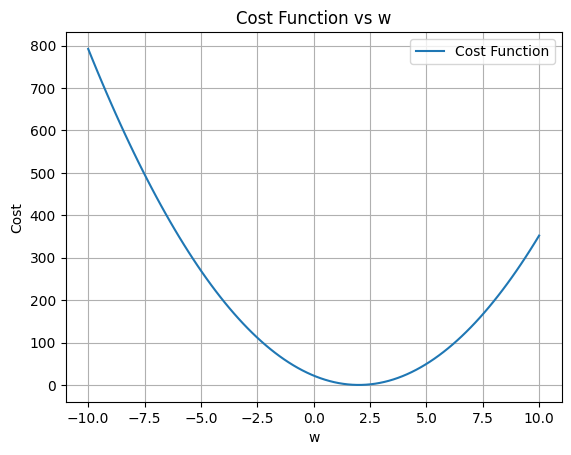

In [33]:
#Varying 'w' and keeping 'b' fixed
w_values = np.linspace(-10,10,100) #range of 'w' values
cost_values = []

#Fixed 'b' value
b = 0

# Compute the cost for each value of `w`
for w in w_values:
    cost = compute_cost(x_train, y_train, w, b)
    cost_values.append(cost)

# Plotting the cost function
plt.plot(w_values, cost_values, label="Cost Function")
plt.xlabel('w')
plt.ylabel('Cost')
plt.title('Cost Function vs w')
plt.grid(True)
plt.legend()
plt.show()

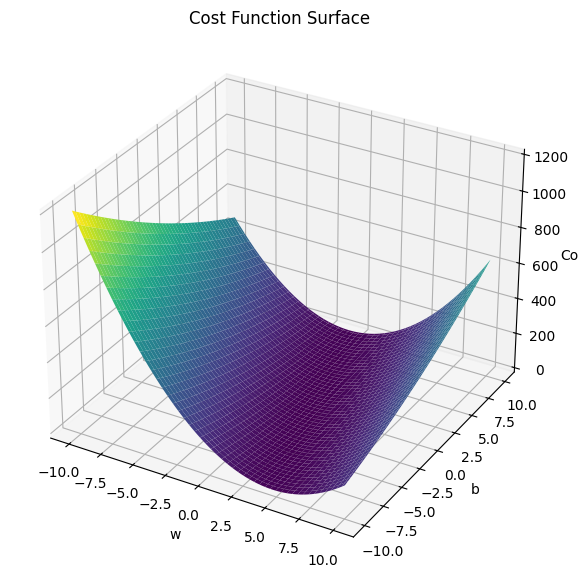

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# 3D cost function surface
w_values = np.linspace(-10, 10, 100)  # range of `w` values
b_values = np.linspace(-10, 10, 100)  # range of `b` values

W, B = np.meshgrid(w_values, b_values)  # create a grid of (w, b) pairs
cost_values_3d = np.zeros(W.shape)  # array to store cost values

# Calculate cost for each (w, b) combination
for i in range(len(w_values)):
    for j in range(len(b_values)):
        cost_values_3d[j, i] = compute_cost(x_train, y_train, w_values[i], b_values[j])

# Plotting the 3D cost function surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, cost_values_3d, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')

plt.show()

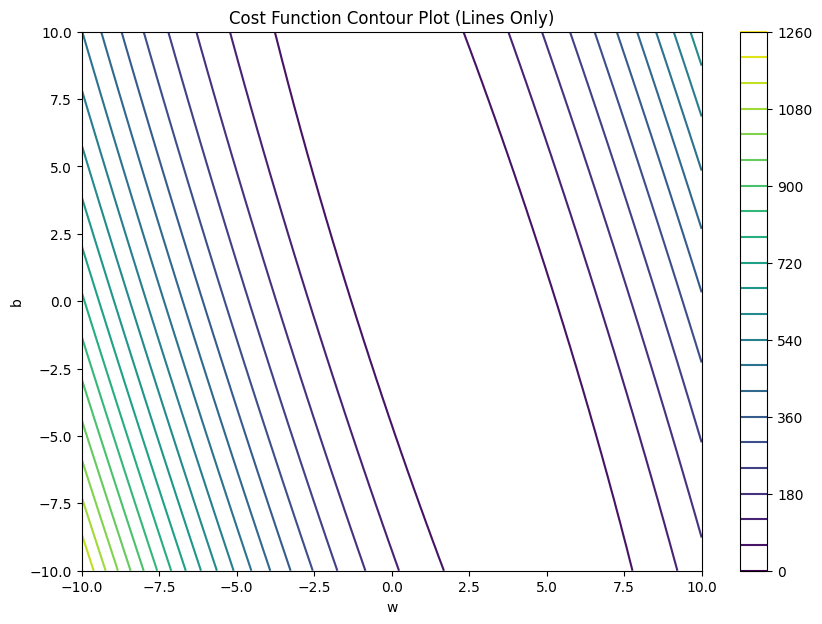

In [37]:
# Create a meshgrid for (w, b) pairs
W, B = np.meshgrid(w_values, b_values)
cost_values = np.zeros(W.shape)  # Array to store cost values

# Compute cost for each (w, b) combination
for i in range(len(w_values)):
    for j in range(len(b_values)):
        cost_values[j, i] = compute_cost(x_train, y_train, w_values[i], b_values[j])

# Plotting the contour plot (lines only)
plt.figure(figsize=(10, 7))
cp = plt.contour(W, B, cost_values, 20, cmap='viridis')  # Contour plot with lines only
plt.colorbar(cp)  # Add color bar to show cost values (optional)

plt.xlabel('w')
plt.ylabel('b')
plt.title('Cost Function Contour Plot (Lines Only)')

plt.show()